# Analyze predictions

In [2]:
import ast
import matplotlib.pyplot as plt
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from captum.attr import visualization as viz
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
# convert strings into lists
def literal_eval_column(column):
    try:
        return ast.literal_eval(column)
    except (SyntaxError, ValueError):
        return column

In [4]:
# read distilbert predictions
dist_test = pd.read_csv('outputs/distilbert_attributions.csv')
dist_test = dist_test.applymap(literal_eval_column).drop(columns=['Unnamed: 0', 'index'])

In [5]:
dist_test.head()

,attributions_pred,label_pred,score,tokens,label_gold,correct,sum_attributions_pred,mean_attributions_pred,attributions_gold,sum_attributions_gold,mean_attributions_gold
0,"[-0.011615987537462793, 0.003815996398574733, ...",rec.autos,0.801348,"[i, am, a, little, confused, on, all, of, the,...",rec.autos,True,2.790767,0.025371,"[-0.011615987537462793, 0.003815996398574733, ...",2.790767,0.025371
1,"[-0.32846125995080416, 0.021676696368081335, -...",comp.windows.x,0.915943,"[i, ', m, not, familiar, at, all, with, the, f...",comp.windows.x,True,3.255837,0.018395,"[-0.32846125995080416, 0.021676696368081335, -...",3.255837,0.018395
2,"[-0.014673215540331483, 0.1312478060786364, 0....",alt.atheism,0.072379,"[in, a, word, ,, yes, .]",alt.atheism,True,1.704919,0.284153,"[-0.014673215540331483, 0.1312478060786364, 0....",1.704919,0.284153
3,"[-0.6194980171999851, 0.0018658245313804055, 0...",talk.politics.mideast,0.808439,"[they, were, attacking, the, iraqi, ##s, to, d...",talk.politics.mideast,True,4.223599,0.008282,"[-0.6194980171999851, 0.0018658245313804055, 0...",4.223599,0.008282
4,"[-0.08235069488343288, 0.03930023488145007, -0...",alt.atheism,0.626613,"[i, ', ve, just, spent, two, solid, months, ar...",talk.religion.misc,False,1.368739,0.068437,"[-0.09691212604112631, 0.011566433822874374, -...",1.375414,0.068771


In [6]:
# read SVM predictions
svm_test = pd.read_csv('outputs/coefs_test.csv')
svm_test = svm_test.applymap(literal_eval_column).drop(columns=['Unnamed: 0'])

In [7]:
# exclude erroneous indices
with open('nohup-att-dist4.out', 'r', encoding='utf-8') as f:
    lines = f.readlines()
error_indices = [int(l.split(' ')[0]) for l in lines[7:] if l]

svm_test = svm_test[~svm_test.index.isin(error_indices)]
svm_test = svm_test.reset_index()

In [83]:
merged_true = dist_test.join(svm_test)
merged_true = merged_true[merged_true['correct'] & (merged_true['pred class no'] == merged_true['true class no'])]

In [118]:
merged_false = dist_test.join(svm_test)
merged_false = merged_false[~merged_false['correct'] & (merged_false['pred class no'] != merged_false['true class no'])]

In [119]:
len(merged_false)

1419

In [72]:
str(dist_test['correct'][2])

'True'

In [84]:
merged_true

,attributions_pred,label_pred,score,tokens,label_gold,correct,sum_attributions_pred,mean_attributions_pred,attributions_gold,sum_attributions_gold,...,true class name,pred class no,pred class name,feature ind,tfidf,feature names,coef true,coef pred,coef true*tfidf,coef pred*tfidf
5,"[0.05916670023602093, 0.049880168135423966, 0....",sci.med,0.973572,"[elisabeth, ,, let, ', s, set, the, record, st...",sci.med,True,11.229551,0.022019,"[0.05916670023602093, 0.049880168135423966, 0....",11.229551,...,sci.med,13,sci.med,"[19176, 18961, 18958, 18256, 18175, 17737, 176...","[0.02257330609894516, 0.011119555870949099, 0....","[yeast, worldwide, world, vagina, use, true, t...","[-0.1261043223409436, -0.4316643674674575, -0....","[-0.1261043223409436, -0.4316643674674575, -0....","[-0.0028465914686021682, -0.004799916051552297...","[-0.0028465914686021682, -0.004799916051552297..."
8,"[-0.20016639778922504, 0.02387592948977581, 0....",comp.windows.x,0.949669,"[hi, ,, we, have, a, requirement, for, dynamic...",comp.windows.x,True,3.124194,0.055789,"[-0.20016639778922504, 0.02387592948977581, 0....",3.124194,...,comp.windows.x,5,comp.windows.x,"[17613, 17388, 15520, 14549, 13650, 13540, 122...","[0.08684470089253907, 0.033720881725893534, 0....","[transition, time, servers, requirement, prope...","[-0.3783963460872076, -0.3869182837314247, -0....","[-0.3783963460872076, -0.3869182837314247, -0....","[-0.03286171749477324, -0.013047225683293088, ...","[-0.03286171749477324, -0.013047225683293088, ..."
9,"[-0.024897561283018472, 0.0023368348448607914,...",comp.graphics,0.909682,"[:, :, well, ,, i, have, lots, of, experience,...",comp.graphics,True,2.632976,0.018674,"[-0.024897561283018472, 0.0023368348448607914,...",2.632976,...,comp.graphics,1,comp.graphics,"[18950, 18910, 18764, 18217, 18177, 18175, 178...","[0.019580373600071935, 0.026502525758204377, 0...","[works, woman, white, utter, used, use, turn, ...","[-0.3476908351377672, -0.46674823302456314, -0...","[-0.3476908351377672, -0.46674823302456314, -0...","[-0.006807916449318501, -0.012370007068329863,...","[-0.006807916449318501, -0.012370007068329863,..."
10,"[-0.07946755072279109, -0.021694599106148113, ...",comp.os.ms-windows.misc,0.880496,"[i, have, uploaded, the, windows, on, -, line,...",comp.os.ms-windows.misc,True,2.493677,0.033249,"[-0.07946755072279109, -0.021694599106148113, ...",2.493677,...,comp.os.ms-windows.misc,2,comp.os.ms-windows.misc,"[19243, 18827, 18817, 18146, 18145, 15604, 147...","[0.0443376099717352, 0.048479181542861814, 0.0...","[zip, windows, win3, uploads, uploaded, sharew...","[-0.4629159114796275, 0.43816726180894294, 0.0...","[-0.4629159114796275, 0.43816726180894294, 0.0...","[-0.02052458513289402, 0.021241990231374408, 0...","[-0.02052458513289402, 0.021241990231374408, 0..."
12,"[0.019016108251523195, -0.0068513122218152, 0....",talk.politics.mideast,0.961296,"[you, *, know, *, that, putting, something, li...",talk.politics.mideast,True,2.343329,0.019366,"[0.019016108251523195, -0.0068513122218152, 0....",2.343329,...,talk.politics.mideast,17,talk.politics.mideast,"[18666, 17756, 16672, 15405, 15005, 14125, 138...","[0.020100234891357215, 0.024572718658572218, 0...","[way, try, substance, seen, rules, realistical...","[-0.40531290794592734, -0.48953599156972316, -...","[-0.40531290794592734, -0.48953599156972316, -...","[-0.008146884654212184, -0.012029230194087989,...","[-0.008146884654212184, -0.012029230194087989,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,"[-0.10859297772008093, 0.010943623349578586, 0...",rec.autos,0.503849,"[1954, mg, -, t, ##f, with, frame, -, up, rest...",rec.autos,True,2.218691,0.006744,"[-0.10859297772008093, 0.010943623349578586, 0...",2.218691,...,rec.autos,7,rec.autos,"[18939, 18859, 18843, 18754, 17388, 16990, 165...","[0.00696332889631547, 0.012491195272564828, 0....","[work, wire, winner, wheels, time, tach, store...","[-0.48744461039500897, -0.46523749440885886

In [13]:
svm_test.tail()

,index,true class no,true class name,pred class no,pred class name,feature ind,tfidf,feature names,coef true,coef pred,coef true*tfidf,coef pred*tfidf
7304,7527,14,sci.space,14,sci.space,"[18607, 18295, 18294, 17756, 17294, 17279, 171...","[0.017691756398058683, 0.018650733635436213, 0...","[warm, varies, varied, try, things, thermal, t...","[-0.4585002959556874, -0.4052604615314347, -0....","[-0.4585002959556874, -0.4052604615314347, -0....","[-0.008111675544485832, -0.007558404920996732,...","[-0.008111675544485832, -0.007558404920996732,..."
7305,7528,4,comp.sys.mac.hardware,4,comp.sys.mac.hardware,"[17316, 10666, 9725, 6231, 5108, 1304]","[0.14779138117244353, 0.2403323623065925, 0.20...","[thought, macs, jim, edu, day, actually]","[-0.4994580224796735, -0.15024876263583953, -0...","[-0.4994580224796735, -0.15024876263583953, -0...","[-0.0738155909799283, -0.036109640057913804, -...","[-0.0738155909799283, -0.036109640057913804, -..."
7306,7529,9,rec.sport.baseball,9,rec.sport.baseball,"[18639, 18501, 18373, 17986, 17316, 17294, 156...","[0.020255864930211472, 0.029267291360587883, 0...","[wasn, void, version, understood, thought, thi...","[-0.40429532821330094, -0.3673492016941159, -0...","[-0.40429532821330094, -0.3673492016941159, -0...","[-0.00818935156020414, -0.010751316117061054, ...","[-0.00818935156020414, -0.010751316117061054, ..."
7307,7530,6,misc.forsale,12,sci.electronics,"[18939, 18226, 18177, 18175, 17392, 16625, 166...","[0.01227474898275108, 0.028237249554259176, 0....","[work, uv, used, use, timer, stuff, student, r...","[-0.6091581217981357, -0.4379001261747615, -0....","[-0.31283400980582565, -0.1472211033427624, -0...","[-0.007477263035876224, -0.01236509514263832, ...","[-0.003839958943634, -0.004157119034742961, -0..."
7308,7531,15,soc.religion.christian,15,soc.religion.christian,"[18939, 18428, 18399, 16809, 16395, 15324, 139...","[0.025833554574752265, 0.05359619747264651, 0....","[work, viewpoint, viable, support, start, scri...","[-0.4113355308195925, -0.4774639320789409, -0....","[-0.4113355308195925, -0.4774639320789409, -0....","[-0.010626258883962635, -0.025590251189769198,...","[-0.010626258883962635, -0.025590251189769198,..."


In [8]:
assert len(svm_test) == len(dist_test)

In [9]:
def merge_subwords(tokens, attributions, aggregate='mean'):
    assert len(tokens) == len(attributions)
    # skip merged tokens
    skip_next_iteration = 0
    tokens_merged = []
    attributions_merged = []
    for i, token in enumerate(tokens):
        if skip_next_iteration != 0:
            skip_next_iteration -= 1
            continue
        if token:
            word = token
            attribution = attributions[i]
            # detokenize
                # check whether next token starts with ##
            if i < len(tokens)-1 and tokens[i+1].startswith('##'):
                # check whether further tokens start with ##
                to_merge = tokens[i:]
                count = 1
                iterator = iter(to_merge[1:])
                while True:
                    try:
                        token = next(iterator)
                        if token.startswith("##"):
                            count += 1
                        else:
                            break
                    except StopIteration:
                        break
                to_merge = to_merge[:count]
                j = len(to_merge)
                word = ''.join(tokens[i:i+j]).replace('##', '')
                attr = [attributions[i:i+j]]
                if aggregate == 'mean':
                    attribution = np.mean(attr)
                skip_next_iteration = count-1
        tokens_merged.append(word)
        attributions_merged.append(attribution)
    assert len(tokens_merged) == len(attributions_merged)
    return tokens_merged, attributions_merged

# features (SVM) != tokens (DistilBERT)
def compare_pred(i, print_result=True, mode='correl'):
    row_svm = svm_test.iloc[i]
    row_dist = dist_test.iloc[i]
    # initialize lists for common features and their attribution/coeff values
    feats = []
    val_svm_gold = []
    val_dist_gold = []
    val_svm_pred = []
    val_dist_pred = []
    # merge subwords and aggregate subword attributions
    tokens, attributions_pred = merge_subwords(row_dist.tokens, row_dist['attributions_pred'])
    tokens2, attributions_gold = merge_subwords(row_dist.tokens, row_dist['attributions_gold'])
    assert tokens == tokens2  # just in case
    for k, f in enumerate(tokens):
        # count tokens only once
        if f in feats:
            continue
        # iterate tokens, check if in SVM features
        if f in row_svm['feature names']:
            feats.append(f)
            svm_index = row_svm['feature names'].index(f)
            val_svm_gold.append(row_svm['coef true*tfidf'][svm_index])
            val_svm_pred.append(row_svm['coef pred*tfidf'][svm_index])
            # feature more than once in sentence
            if tokens.count(f) > 1:
                indices = [j for j, token in enumerate(tokens) if token == f]
                val_dist_gold.append(np.mean([attributions_gold[j] for j in indices]))
                val_dist_pred.append(np.mean([attributions_pred[j] for j in indices]))
            else:
                # feature index in distilbert tokens
                val_dist_gold.append(attributions_gold[k])
                val_dist_pred.append(attributions_pred[k])
    assert len(feats) == len(val_dist_gold)
    assert len(val_dist_gold) == len(val_dist_pred)
    assert len(val_dist_pred) == len(val_svm_gold)
    assert len(val_svm_gold) == len(val_svm_pred)
    correl_gold = np.corrcoef(val_dist_gold, val_svm_gold)
    correl_pred = np.corrcoef(val_dist_pred, val_svm_pred)
    if print_result:
        print(feats)
        print(correl_gold)
        print(correl_pred)
    if mode == 'correl':  # return correlations information
        return len(feats), len(tokens), correl_gold[0][1], correl_pred[0][1], feats
    elif mode == 'feats':  # return features, coefficients, attributions
        return feats, tokens, val_dist_gold, val_dist_pred, val_svm_gold, val_svm_pred

In [140]:
all_dist_gold = []
all_dist_pred = []
all_svm_gold = []
all_svm_pred = []

for i in range(len(svm_test)):
    if not svm_test.iloc[i]['feature ind']:  # exclude instances wo features
        continue
    _, _, val_dist_gold, val_dist_pred, val_svm_gold, val_svm_pred = compare_pred(i, print_result=False, mode='feats')
    all_dist_gold.extend(val_dist_gold)
    all_dist_pred.extend(val_dist_pred)
    all_svm_gold.extend(val_svm_gold)
    all_svm_pred.extend(val_svm_pred)

c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [155]:
all_values = pd.DataFrame({'all_dist_gold': all_dist_gold,
                           'all_dist_pred': all_dist_pred,
                           'all_svm_gold': all_svm_gold,
                           'all_svm_pred': all_svm_pred})

In [156]:
all_values.corr()

,all_dist_gold,all_dist_pred,all_svm_gold,all_svm_pred
all_dist_gold,1.000000,0.795057,0.037089,0.024632
all_dist_pred,0.795057,1.000000,-0.026069,-0.005021
all_svm_gold,0.037089,-0.026069,1.000000,0.945506
all_svm_pred,0.024632,-0.005021,0.945506,1.000000


In [157]:
all_values.describe()

,all_dist_gold,all_dist_pred,all_svm_gold,all_svm_pred
count,303459.000000,303459.000000,303459.000000,303459.000000
mean,0.027565,0.030366,-0.009247,-0.009001
std,0.103340,0.103726,0.012641,0.011655
min,-0.997724,-0.996871,-0.556641,-0.398256
25%,-0.000397,0.000261,-0.010934,-0.010779
50%,0.006847,0.007377,-0.005900,-0.005831
75%,0.025827,0.026989,-0.003532,-0.003493
max,0.988448,0.988448,0.345678,0.345678


In [ ]:
classification = {'0': 'both_true',
 '1': 'svm_true_dist_false',
 '2': 'dist_true_svm_false',
 '3': 'both_false_same_label',
 '4': 'both_false_diff_label'}

In [11]:
classification_results = []

for i, row in svm_test.iterrows():
    svm_class, dist_class = False, False
    if row['true class no'] == row['pred class no']:
        svm_class = True
    if dist_test.iloc[i].correct:
        dist_class = True
    if svm_class:
        if dist_class:  # both correct
            classification_results.append(0)
        else:
            classification_results.append(1)
    elif dist_class and not svm_class:
        classification_results.append(2)
    else:  # both false
        if row['pred class name'] == dist_test.iloc[i]['label_pred']:
            classification_results.append(3)
        else:  # different labels
            classification_results.append(4)

In [12]:
for i in range(5):
    print(i, classification_results.count(i))

0 4588
1 635
2 667
3 687
4 732


In [14]:
correls = pd.DataFrame(columns=['num_feats', 'num_tokens', 'correl_gold', 'correl_pred', 'features'])

num_instances = len(svm_test)

for i in range(num_instances):
    correls.loc[len(correls)] = list(compare_pred(i, print_result=False))

correls['classification_result'] = classification_results

c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\lydia\anaconda3\lib\site-packages\numpy\core\_methods.py:182: Ru

In [125]:
svm_test.iloc[4013]

index                                                           4115
true class no                                                      9
true class name                                   rec.sport.baseball
pred class no                                                      9
pred class name                                   rec.sport.baseball
feature ind        [19175, 12936, 12282, 8564, 8348, 7242, 2691, ...
tfidf              [0.077281026420679, 0.24300201017047424, 0.160...
feature names      [years, phillies, opponents, hit, haven, finis...
coef true          [-0.3587379871931967, 0.05028485983173936, -0....
coef pred          [-0.3587379871931967, 0.05028485983173936, -0....
coef true*tfidf    [-0.027723639866378637, 0.0122193220202532, -0...
coef pred*tfidf    [-0.027723639866378637, 0.0122193220202532, -0...
Name: 4013, dtype: object

In [15]:
correls.sort_values(by='correl_gold').head(n=50)

,num_feats,num_tokens,correl_gold,correl_pred,features,classification_result
5340,2,4,-1.000000,-1.000000,"[simple, eh]",3
6923,2,11,-1.000000,-1.000000,"[discussion, tesla]",1
6876,2,4,-1.000000,1.000000,"[lou, gehrig]",1
100,2,21,-1.000000,1.000000,"[1993apr21, ca]",3
6633,2,12,-1.000000,1.000000,"[really, 10]",4
7148,2,14,-1.000000,1.000000,"[compared, os]",2
5916,2,13,-1.000000,1.000000,"[dear, come]",1
5737,2,7,-1.000000,-1.000000,"[sub, says]",4
5510,2,6,-1.000000,-1.000000,"[urban, areas]",2
5415,2,11,-1.000000,-1.000000,"[agree, joe]",4


In [117]:
2826 in merged_true.index

False

In [123]:
merged_true[(merged_true['true class no'] == 9) & (merged_true['tokens'].apply(len) < 25)]

,attributions_pred,label_pred,score,tokens,label_gold,correct,sum_attributions_pred,mean_attributions_pred,attributions_gold,sum_attributions_gold,...,true class name,pred class no,pred class name,feature ind,tfidf,feature names,coef true,coef pred,coef true*tfidf,coef pred*tfidf
550,"[0.06017276776967649, -0.056167423084339314, 0...",rec.sport.baseball,0.971916,"[the, subject, line, says, it, all, ., what, i...",rec.sport.baseball,True,1.756846,0.079857,"[0.06017276776967649, -0.056167423084339314, 0...",1.756846,...,rec.sport.baseball,9,rec.sport.baseball,"[16645, 15199, 15184, 15001, 13873, 13039, 107...","[0.10243263234350215, 0.10038622293510485, 0.1...","[subject, says, save, rule, qualifies, pitcher...","[-0.48756596859932955, -0.40652903073134805, -...","[-0.48756596859932955, -0.40652903073134805, -...","[-0.04994266560473864, -0.0408099139085892, -0...","[-0.04994266560473864, -0.0408099139085892, -0..."
860,"[0.1834555998417606, 0.6188229166055477, 0.120...",rec.sport.baseball,0.970488,"[1b, career, :, don, matt, ##ingly, !, !, !, !...",rec.sport.baseball,True,2.725337,0.194667,"[0.1834555998417606, 0.6188229166055477, 0.120...",2.725337,...,rec.sport.baseball,9,rec.sport.baseball,"[10924, 3437, 329]","[0.3850877013058235, 0.2692604420486201, 0.345...","[mattingly, career, 1b]","[-0.3272510346448707, -0.07464043830560863, -0...","[-0.3272510346448707, -0.07464043830560863, -0...","[-0.12602034868134565, -0.020097717412870936, ...","[-0.12602034868134565, -0.020097717412870936, ..."
1204,"[0.11682693990408073, -0.004523995407641745, 0...",rec.sport.baseball,0.770117,"[let, ', s, not, forget, al, michaels, ,, of, ...",rec.sport.baseball,True,0.204694,0.010773,"[0.11682693990408073, -0.004523995407641745, 0...",0.204694,...,rec.sport.baseball,9,rec.sport.baseball,"[11248, 11143, 10296, 7449, 7013, 2623, 1560]","[0.18324964482298056, 0.21561574558794566, 0.0...","[miracles, michaels, let, forget, fame, believ...","[-0.44713615974976473, -0.446401481648919, -0....","[-0.44713615974976473, -0.446401481648919, -0....","[-0.08193754246165588, -0.09625118829729531, -...","[-0.08193754246165588, -0.09625118829729531, -..."
1456,"[0.06852741068833756, 0.2688942479844086, 0.18...",rec.sport.baseball,0.972348,"[mike, schmidt, ', s, 500, ##th, :, not, only,...",rec.sport.baseball,True,2.480328,0.107840,"[0.06852741068833756, 0.2688942479844086, 0.18...",2.480328,...,rec.sport.baseball,9,rec.sport.baseball,"[18843, 15252, 11177, 9736, 9260, 7693, 1116]","[0.14942827264895836, 0.1866853751481754, 0.11...","[winner, schmidt, mike, john, inning, game, 9th]","[-0.4636386880269563, -0.3321531201856228, -0....","[-0.4636386880269563, -0.3321531201856228, -0....","[-0.06928072828509738, -0.06200812984848999, -...","[-0.06928072828509738, -0.06200812984848999, -..."
1493,"[0.12448467242817342, -0.030673797768945184, 0...",rec.sport.baseball,0.969254,"[have, there, ever, been, any, other, no, -, h...",rec.sport.baseball,True,1.085158,0.072344,"[0.12448467242817342, -0.030673797768945184, 0...",1.085158,...,rec.sport.baseball,9,rec.sport.baseball,"[10829, 8572, 8563]","[0.42626620389122966, 0.3435643847872596, 0.23...","[mariner, hitters, history]","[-0.4132571524166665, -0.28811234003356023, -0...","[-0.4132571524166665, -0.28811234003356023, -0...","[-0.17615755759155174, -0.09898513885324786, -...","[-0.17615755759155174, -0.09898513885324786, -..."
2607,"[-0.02233123668544837, -0.0791639156125921, 0....",rec.sport.baseball,0.971645,"[i, am, just, wondering, whether, the, officia...",rec.sport.baseball,True,3.178411,0.167285,"[-0.02233123668544837, -0.0791639156125921, 0....",3.178411,...,rec.sport.baseball,9,rec.sport.baseball,"[18918, 18581, 16425, 12177, 11319, 9379, 9067...","[0.08574281033104189, 0.12611154241267566, 0.1...","[wondering, walks, stats, official, mlb, inten...","[-0.3547639958301354, -0.3494331253101518, -0....","[-0.3547639958301354, -0.3494331253101518, -0....","[-0.030418462006745837, -0.04406755040294502, ...","[-

['phillies', 'finished', 'years', 'ago', 'opponents', 'haven', 'hit', 'better'] [0.0122193220202532, -0.05428022441144953, -0.027723639866378637, -0.044604926424122796, -0.05822702178937956, -0.051661570773648, -0.007988529838132013, -0.026908780053336703] [0.5911675558219109, 0.07798133776273959, 0.046348525225550836, -0.03812752889468629, 0.10175146033527369, 0.07235932071049997, 0.21632760770376078, 0.022859164153137997]


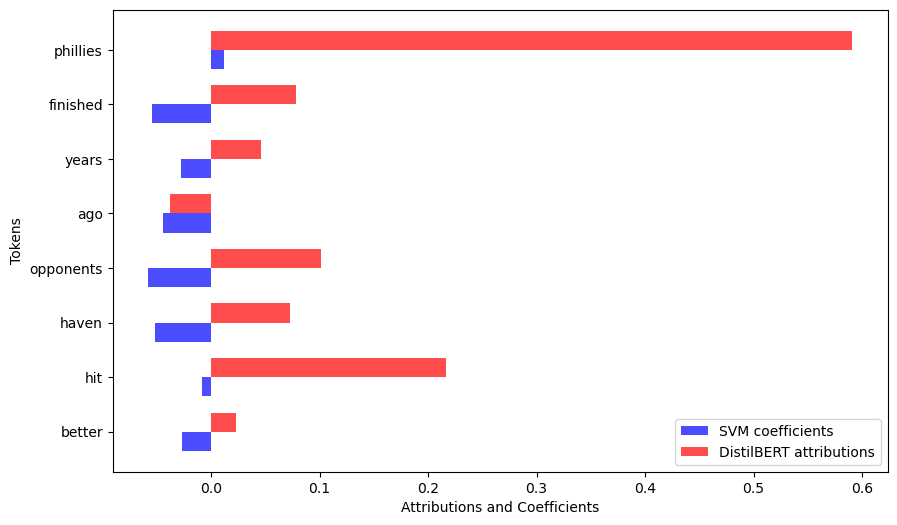

In [124]:
plot(4013)

In [105]:
merged_true.loc[2694]

attributions_pred         [-0.07430588657804829, -0.06985179587783458, 0...
label_pred                                                    comp.graphics
score                                                              0.919941
tokens                    [i, believe, many, people, will, be, happy, to...
label_gold                                                    comp.graphics
correct                                                                True
sum_attributions_pred                                              0.852372
mean_attributions_pred                                             0.035516
attributions_gold         [-0.07430588657804829, -0.06985179587783458, 0...
sum_attributions_gold                                              0.852372
mean_attributions_gold                                             0.035516
index                                                                  2765
true class no                                                             1
true class n

In [16]:
correls.sort_values(by='correl_gold', na_position='first').tail(n=50)

,num_feats,num_tokens,correl_gold,correl_pred,features,classification_result
4604,9,21,0.980342,0.980342,"[anybody, information, number, people, killed,...",0
6883,10,33,0.983256,0.983256,"[sell, bike, let, ride, stay, home, kids, geez...",0
6543,7,34,0.983577,0.983577,"[wondering, kind, brand, best, bike, thanks, a...",0
2694,7,23,0.983968,0.983968,"[believe, people, happy, information, post, co...",0
1016,5,9,0.985735,0.985735,"[gps, launch, scheduled, june, 24th]",0
982,3,13,0.986391,0.986391,"[comp, graphics, faq]",0
3483,4,20,0.986541,0.986541,"[known, neat, extended, 3d]",0
2454,4,23,0.987570,0.987570,"[hold, shuttle, bring, use]",0
1161,3,13,0.988844,-0.996873,"[calling, gates, jason]",4
6706,4,14,0.993732,-0.305017,"[village, happy, returns, seeing]",2


In [48]:
correls.sort_values(by='correl_gold', ascending=False).head()

,num_feats,num_tokens,correl_gold,correl_pred,features
751,2,6,1.0,1.0,"[getting, close]"
1147,2,6,1.0,-1.0,"[religion, alt]"
1303,2,10,1.0,-1.0,"[thing, heater]"
6614,2,14,1.0,1.0,"[let, clarify]"
5498,2,11,1.0,-1.0,"[okay, forgot]"


In [62]:
correls.sort_values(by='correl_pred').head(n=50)

,num_feats,num_tokens,correl_gold,correl_pred,features
489,2,6,1.000000,-1.000000,"[stuff, deleted]"
1303,2,10,1.000000,-1.000000,"[thing, heater]"
3127,2,7,1.000000,-1.000000,"[compuserve, com]"
3609,2,9,1.000000,-1.000000,"[got, reversed]"
782,2,13,1.000000,-1.000000,"[non, cold]"
3686,2,5,-1.000000,-1.000000,"[look, spice]"
5258,2,5,-1.000000,-1.000000,"[25mhz, iisi]"
3851,2,15,1.000000,-1.000000,"[carried, away]"
4802,2,19,-1.000000,-1.000000,"[certainly, error]"
1391,2,9,-1.000000,-1.000000,"[goto, flag]"


In [64]:
correls.sort_values(by='correl_pred', na_position='first').tail(n=50)

,num_feats,num_tokens,correl_gold,correl_pred,features
171,6,29,0.973635,0.973635,"[blown, riding, bike, drive, home, ride]"
42,10,47,0.975293,0.975293,"[closed, access, road, pay, resident, sticker,..."
5830,5,10,0.976567,0.976567,"[stuff, hard, atheist, books, deleted]"
4585,6,26,0.976994,0.976994,"[countersteering, method, leaning, bike, leane..."
7103,6,13,0.977196,0.977196,"[curious, clipper, chip, handle, conference, c..."
4604,9,21,0.980342,0.980342,"[anybody, information, number, people, killed,..."
6333,6,11,-0.008201,0.982919,"[greetings, sorry, typos, clipper, hooks, al]"
6883,10,33,0.983256,0.983256,"[sell, bike, let, ride, stay, home, kids, geez..."
6543,7,34,0.983577,0.983577,"[wondering, kind, brand, best, bike, thanks, a..."
2694,7,23,0.983968,0.983968,"[believe, people, happy, information, post, co..."


-> highest and lowest correlations for fewest features / shortest sentences!

In [36]:
correls.head()

,num_feats,num_tokens,correl_gold,correl_pred,features
0,28,103,-0.109221,0.084914,"[year, words, value, usually, time, tell, summ..."
1,28,166,0.106889,0.041291,"[view, ve, uncompressed, swamped, send, seeing..."
2,2,6,1.000000,-1.000000,"[yes, word]"
3,120,478,0.022760,0.126682,"[york, world, women, west, want, ve, times, ti..."
4,9,20,0.732862,0.428710,"[ve, thing, spent, solid, objective, moral, mo..."


In [37]:
# slightly higher correlation of gold class attributions/coefficients
np.mean(correls.correl_gold), np.mean(correls.correl_pred)

(0.2826740357767589, 0.25590147310534667)

In [17]:
# correlations not related to numbers of features or tokens in a sentence
correls.corr()

,num_feats,num_tokens,correl_gold,correl_pred,classification_result
num_feats,1.000000,0.944143,-0.017452,0.023974,-0.220609
num_tokens,0.944143,1.000000,-0.039823,0.004972,-0.206382
correl_gold,-0.017452,-0.039823,1.000000,0.620412,-0.376070
correl_pred,0.023974,0.004972,0.620412,1.000000,-0.380150
classification_result,-0.220609,-0.206382,-0.376070,-0.380150,1.000000


In [25]:
correls.iloc[678]

num_feats                                                                7
num_tokens                                                              39
correl_gold                                                       0.411426
correl_pred                                                       0.237778
features                 [read, wonderful, reason, flames, reminded, ca...
classification_result                                                    4
Name: 678, dtype: object

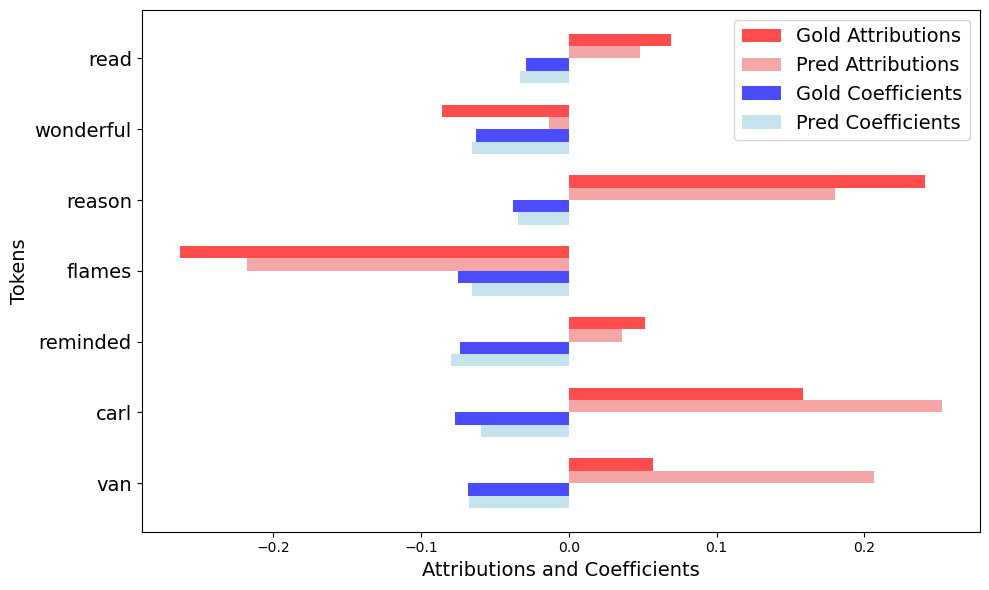

In [37]:
plot(678, target='both')

(None, None)

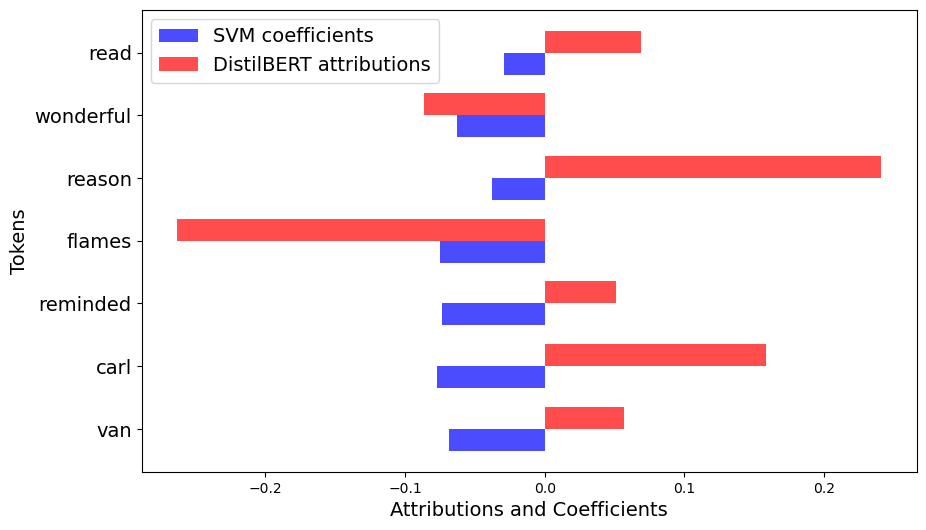

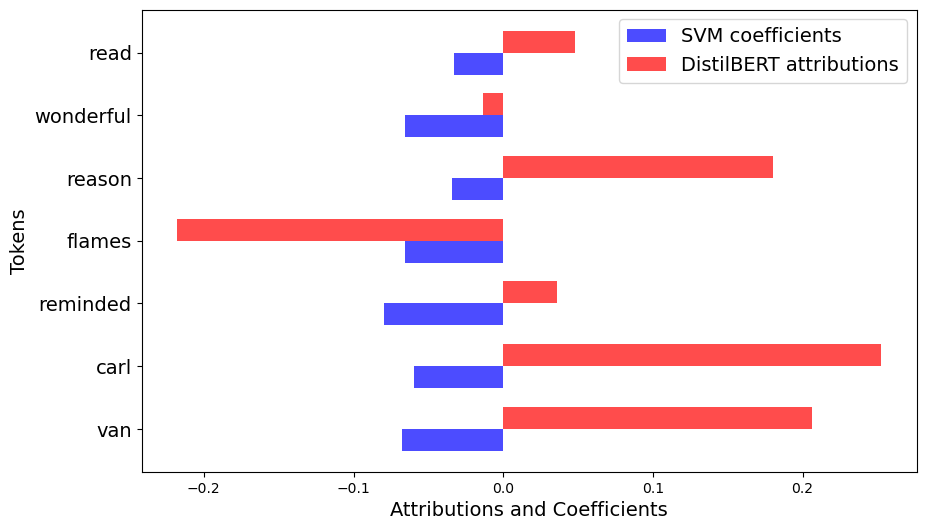

In [29]:
plot(678), plot(678, target='pred')

In [26]:
dist_test.iloc[678]

attributions_pred         [-0.3045768969262564, 0.04810194325516527, 0.0...
label_pred                                               talk.religion.misc
score                                                              0.178964
tokens                    [i, read, it, ., i, found, it, wonderful, ., f...
label_gold                                                      alt.atheism
correct                                                               False
sum_attributions_pred                                              1.948671
mean_attributions_pred                                             0.048717
attributions_gold         [-0.36699016741974677, 0.06914735958530309, 0....
sum_attributions_gold                                              1.885084
mean_attributions_gold                                             0.047127
Name: 678, dtype: object

In [24]:
svm_test[svm_test['index'] == 694]

,index,true class no,true class name,pred class no,pred class name,feature ind,tfidf,feature names,coef true,coef pred,coef true*tfidf,coef pred*tfidf
678,694,0,alt.atheism,11,sci.crypt,"[18917, 18275, 14437, 14142, 14109, 7296, 3446]","[0.15272561012796224, 0.15176089489196604, 0.1...","[wonderful, van, reminded, reason, read, flame...","[-0.40967664546800964, -0.45010176318131245, -...","[-0.42773996483827703, -0.44641756811003264, -...","[-0.06256811563427865, -0.06830784637284774, -...","[-0.06532684710603898, -0.06774872963187376, -..."


In [ ]:
correls.to_csv('outputs/predictions-correlations.csv')

In [36]:
# do some nice visualizations
def barplot(feats, coeffs, attributions, outpath):
    
    # Define the x-axis positions for the tokens
    y = np.arange(len(feats))

    # Create the barplot
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.barh(y + 0.175, attributions[::-1], label='DistilBERT attributions', color='red', alpha=0.7, height=0.35)
    plt.barh(y - 0.175, coeffs[::-1], label='SVM coefficients', color='blue', alpha=0.7, height=0.35)

    # Add labels and title
    plt.ylabel('Tokens', fontsize=14)
    plt.xlabel('Attributions and Coefficients', fontsize=14)
    # plt.title('Attributions Comparison')
    plt.yticks(y, feats[::-1], fontsize=14)  # Set token labels on the x-axis
    plt.legend(fontsize=14)  # Show the legend
    plt.savefig(outpath, bbox_inches='tight')

def plot(i, target='gold'):
    feats, tokens, val_dist_gold, val_dist_pred, val_svm_gold, val_svm_pred = \
        compare_pred(i, print_result=False, mode='feats')
    if target == 'gold':
        barplot(feats, val_svm_gold, val_dist_gold, outpath=f'outputs/viz/instance_{i}.png')
    elif target == 'pred':
        barplot(feats, val_svm_pred, val_dist_pred, outpath=f'outputs/viz/instance_{i}_pred.png')
    elif target == 'both':
        barplot_both(feats, val_dist_gold, val_dist_pred, val_svm_gold, val_svm_pred, outpath=f'outputs/viz/instance_{i}_both.png')

In [35]:
def barplot_both(feats, attributions_gold, attributions_pred, coeffs_gold, coeffs_pred, outpath):
    
    # Define the y-axis positions for the tokens
    y = np.arange(len(feats))
    height = 0.35/2  # Height of the bars

    # Create the horizontal stacked barplot
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    # Attributions (red)
    plt.barh(y + height * 1.5, attributions_gold[::-1], height, label='Gold Attributions', color='red', alpha=0.7)
    plt.barh(y + height * 0.5, attributions_pred[::-1], height, label='Pred Attributions', color='lightcoral', alpha=0.7)

    # Coefficients (blue)
    plt.barh(y - height * 0.5, coeffs_gold[::-1], height, label='Gold Coefficients', color='blue', alpha=0.7)
    plt.barh(y - height * 1.5, coeffs_pred[::-1], height, label='Pred Coefficients', color='lightblue', alpha=0.7)


    # Add labels and title
    plt.xlabel('Attributions and Coefficients', fontsize=14)
    plt.ylabel('Tokens', fontsize=14)
    plt.yticks(y, feats[::-1], fontsize=14)  # Set token labels on the y-axis
    plt.legend(fontsize=14)  # Show the legend
    plt.tight_layout()

    # Save the plot to the specified output path
    plt.savefig(outpath)

['believe', 'people', 'happy', 'information', 'post', 'comp', 'graphics'] [-0.06685466625660841, -0.05540356079804139, -0.06948107581588665, -0.04863771807793592, -0.060358938431706755, -0.06564495101394642, 0.04879218861563902] [-0.06985179587783458, -0.055702560361381756, 0.012580362643046988, 0.08058630293194724, -0.04330838762470383, 0.024233035315091855, 0.9398215602369805]


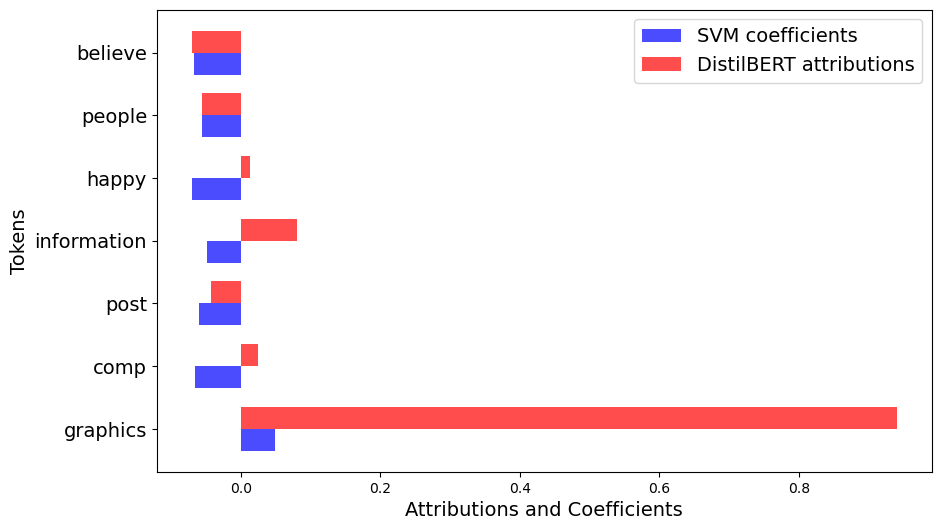

In [130]:
plot(2694)

['ve', 'spent', 'solid', 'months', 'arguing', 'thing', 'objective', 'moral', 'exists'] [-0.031128538173265812, -0.049867347238664574, -0.05671233383941306, -0.04632030649892373, -0.04600534451152419, -0.0453911111205724, -0.02992969593069396, -0.02513820847019012, -0.04141320116073546] [-0.004419299194421766, -0.13133029535882443, -0.17635902812562063, -0.11847112311968727, 0.28709269609495724, 0.04197022454719444, 0.24776842802439084, 0.8522974089407261, 0.06418855181335427]


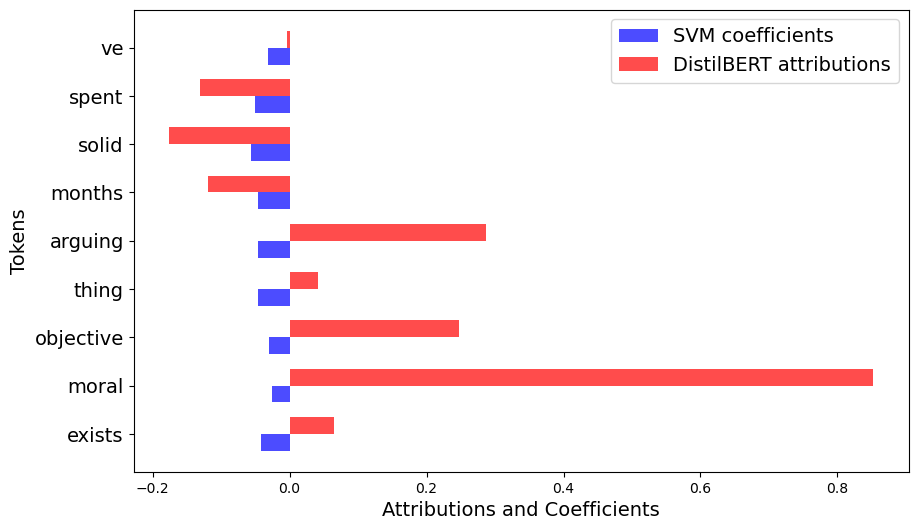

In [131]:
plot(4)

['anybody', 'information', 'number', 'people', 'killed', 'israel', '44', 'happy', 'year'] [-0.0504055380587328, -0.04462912159730531, -0.046976273944533284, -0.025758892239881703, -0.047073219811706035, 0.0694545684962747, -0.07172934246951773, -0.05423220818739405, -0.0487150943478109] [-0.03161742498105083, 0.02202962979865216, -0.0034315855126628024, 0.18822408746873112, 0.13052236782855442, 0.9358025735105642, -0.027098043500767385, -0.009230428380415802, -0.02082382260552542]


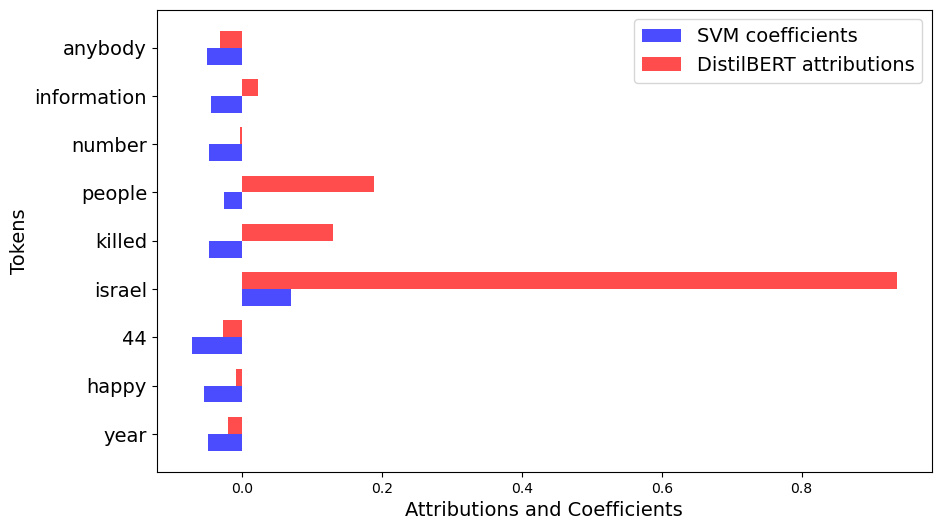

In [133]:
plot(4604)

['phillies', 'finished', 'years', 'ago', 'opponents', 'haven', 'hit', 'better'] [0.0122193220202532, -0.05428022441144953, -0.027723639866378637, -0.044604926424122796, -0.05822702178937956, -0.051661570773648, -0.007988529838132013, -0.026908780053336703] [0.5911675558219109, 0.07798133776273959, 0.046348525225550836, -0.03812752889468629, 0.10175146033527369, 0.07235932071049997, 0.21632760770376078, 0.022859164153137997]


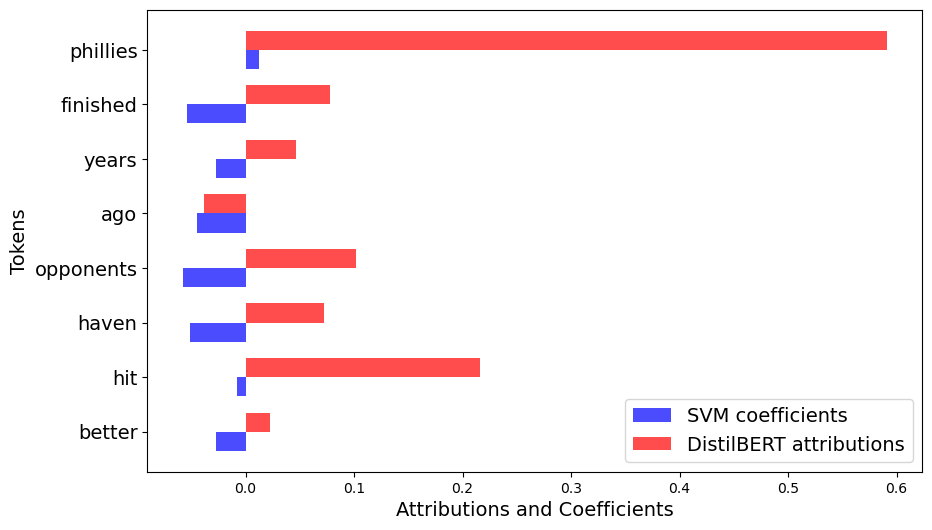

In [132]:
plot(4013)

In [40]:
type(svm_test['pred class name'][0]), type(dist_test['label_pred'][0])

(str, str)

In [42]:
label2id = {
    "alt.atheism": 0,
    "comp.graphics": 1,
    "comp.os.ms-windows.misc": 2,
    "comp.sys.ibm.pc.hardware": 3,
    "comp.sys.mac.hardware": 4,
    "comp.windows.x": 5,
    "misc.forsale": 6,
    "rec.autos": 7,
    "rec.motorcycles": 8,
    "rec.sport.baseball": 9,
    "rec.sport.hockey": 10,
    "sci.crypt": 11,
    "sci.electronics": 12,
    "sci.med": 13,
    "sci.space": 14,
    "soc.religion.christian": 15,
    "talk.politics.guns": 16,
    "talk.politics.mideast": 17,
    "talk.politics.misc": 18,
    "talk.religion.misc": 19
  }

In [43]:
dist_label_pred = [label2id[l] for l in dist_test['label_pred']]

In [44]:
# correlations
# compare predicted labels, have to ignore nan values with ma
np.corrcoef(np.ma.masked_invalid(svm_test['pred class no']),
            np.ma.masked_invalid(dist_label_pred))

array([[1.        , 0.71812724],
       [0.71812724, 1.        ]])